In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_excel(r"C:\Users\KIIT\Downloads\combined_clean.xlsx")

In [ ]:
df.head()

,Unnamed: 0,Origin,Destination,Cabin,Booking Class,Airline,Flight number,Dep_Date,Dep_time,Booking Class Fare USD,sch. Effective Date,sch. Discontinued Date,Dep Time,Arr Time,Flight Duration (mins),Frequency (MTWTFSS),Total_Dept,Seats per Dept
0,0.0,BBB,DDD,Y,N,AA,304.0,2022-04-10,05:55,200.01,20231201.0,20231231.0,15:55:00,17:50:00,145.0,1234567,31.0,186.0
1,1.0,BBB,DDD,Y,T,AA,304.0,2022-04-10,05:55,463.65,20231101.0,20231130.0,10:30:00,12:30:00,150.0,1234567,30.0,176.0
2,2.0,BBB,DDD,Y,E,AA,304.0,2022-04-10,05:55,149.83,20231204.0,20231231.0,18:50:00,20:50:00,150.0,12345--,20.0,174.0
3,3.0,BBB,DDD,J,D,AA,304.0,2022-04-10,05:55,127.29,20231101.0,20231130.0,20:50:00,22:55:00,155.0,12345--,22.0,100.0
4,4.0,BBB,DDD,Y,V,AA,304.0,2022-04-10,05:55,90.92,20221017.0,20221023.0,20:25:00,22:15:00,140.0,12345-7,6.0,174.0


In [ ]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
print(df.columns)
columns_to_convert = [' Origin', ' Destination', 'Cabin', 'Booking Class', 'Airline',
       'Flight number', 'Dep_Date', 'Dep_time', ' Booking Class Fare USD ',
       'sch. Effective Date', 'sch. Discontinued Date', 'Dep Time', 'Arr Time',
       'Flight Duration (mins)', 'Frequency (MTWTFSS)', 'Total_Dept',
       'Seats per Dept']
for col in columns_to_convert:
  df[col] = df[col].astype(str)

Index([' Origin', ' Destination', 'Cabin', 'Booking Class', 'Airline',
       'Flight number', 'Dep_Date', 'Dep_time', ' Booking Class Fare USD ',
       'sch. Effective Date', 'sch. Discontinued Date', 'Dep Time', 'Arr Time',
       'Flight Duration (mins)', 'Frequency (MTWTFSS)', 'Total_Dept',
       'Seats per Dept'],
      dtype='object')


In [ ]:
df.head()

,Origin,Destination,Cabin,Booking Class,Airline,Flight number,Dep_Date,Dep_time,Booking Class Fare USD,sch. Effective Date,sch. Discontinued Date,Dep Time,Arr Time,Flight Duration (mins),Frequency (MTWTFSS),Total_Dept,Seats per Dept
0,BBB,DDD,Y,N,AA,304.0,2022-04-10,05:55,200.01,20231201.0,20231231.0,15:55:00,17:50:00,145.0,1234567,31.0,186.0
1,BBB,DDD,Y,T,AA,304.0,2022-04-10,05:55,463.65,20231101.0,20231130.0,10:30:00,12:30:00,150.0,1234567,30.0,176.0
2,BBB,DDD,Y,E,AA,304.0,2022-04-10,05:55,149.83,20231204.0,20231231.0,18:50:00,20:50:00,150.0,12345--,20.0,174.0
3,BBB,DDD,J,D,AA,304.0,2022-04-10,05:55,127.29,20231101.0,20231130.0,20:50:00,22:55:00,155.0,12345--,22.0,100.0
4,BBB,DDD,Y,V,AA,304.0,2022-04-10,05:55,90.92,20221017.0,20221023.0,20:25:00,22:15:00,140.0,12345-7,6.0,174.0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
df.fillna(0, inplace=True)
df = df.sample(frac=0.08)

In [ ]:
import datacleaner
from datacleaner import autoclean
df = autoclean(df)
df.head()

,Origin,Destination,Cabin,Booking Class,Airline,Flight number,Dep_Date,Dep_time,Booking Class Fare USD,sch. Effective Date,sch. Discontinued Date,Dep Time,Arr Time,Flight Duration (mins),Frequency (MTWTFSS),Total_Dept,Seats per Dept
171810,3,0,1,9,0,39,63,62,792,362,330,150,166,24,97,24,24
145532,4,4,1,15,0,45,219,26,1406,362,330,150,166,24,97,24,24
187354,3,2,1,12,0,49,311,53,468,362,330,150,166,24,97,24,24
140949,4,4,1,3,0,41,132,2,628,362,330,150,166,24,97,24,24
25081,1,3,1,15,0,25,261,53,1131,362,330,150,166,24,97,24,24


In [ ]:
x = df.drop([' Booking Class Fare USD '], axis = 1)
print(x)

         Origin   Destination  Cabin  Booking Class  Airline  Flight number  \
171810        3             0      1              9        0             39   
145532        4             4      1             15        0             45   
187354        3             2      1             12        0             49   
140949        4             4      1              3        0             41   
25081         1             3      1             15        0             25   
...         ...           ...    ...            ...      ...            ...   
131016        4             4      1             17        0             45   
178355        3             0      1             21        0             34   
50352         1             3      1             11        0             16   
19160         1             3      1              3        0             21   
84989         0             1      1             11        0              0   

        Dep_Date  Dep_time  sch. Effective Date  sc

In [ ]:
y = df[' Booking Class Fare USD ']
print(y)

171810     792
145532    1406
187354     468
140949     628
25081     1131
          ... 
131016     495
178355     662
50352      776
19160     1341
84989      493
Name:  Booking Class Fare USD , Length: 15662, dtype: int32


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 3)

In [ ]:
print( x_test.shape, y_test.shape, x_train.shape, y_train.shape)

(3133, 16) (3133,) (12529, 16) (12529,)


In [ ]:
model = RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

MAE: 351.7426042152346
MSE: 172620.09284977269
RMSE: 415.4757427934544
R2 Score: -0.1784804937482587


In [ ]:
import numpy as np

In [ ]:
a=np.array([[2,1],[1,3]])

In [ ]:
print(a*a)

[[4 1]
 [1 9]]


In [ ]:
A = np.random.randn(4,3)

B = np.sum(A, axis = 1, keepdims = True)
B.shape

(4, 1)

In [ ]:
import pandas as pd

In [ ]:
rand = pd.read_csv("/content/PastHires.csv")

In [ ]:
rand.iloc[5:11]



,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
5,0,N,0,PhD,Y,Y,Y
6,5,Y,2,MS,N,Y,Y
7,3,N,1,BS,N,Y,Y
8,15,Y,5,BS,N,N,Y
9,0,N,0,BS,N,N,N
10,1,N,1,PhD,Y,N,N


In [ ]:
new_df = rand[['Previous employers', 'Hired']]

In [ ]:
new_df.head()

,Previous employers,Hired
0,4,Y
1,0,Y
2,6,N
3,1,Y
4,2,N


In [ ]:
prev_employs = rand['Previous employers'].value_counts()

<Axes: >

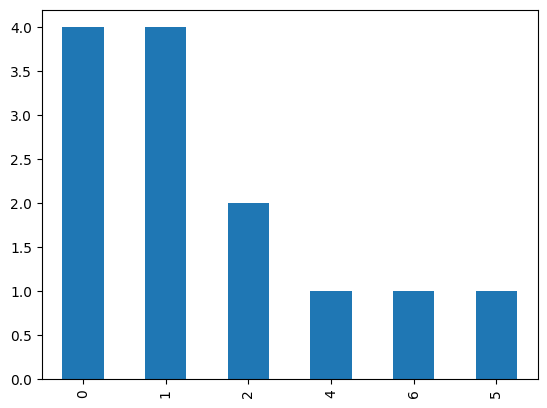

In [ ]:
prev_employs.plot(kind = 'bar')